#1. Introduction


Housing price competition aims at predicting sale prices for the houses in ‘Ames city’ in Story County, Iowa, United States. The dataset is divided into two halves: testing and training (~50-50%). There are 80 variables in the training dataset. From my experience, there are two things for getting good prediction:

### Data describtion:

- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street: Type of road access to property.
- Alley: Type of alley access to property.
- LotShape: General shape of property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on house.
- Exterior2nd: Exterior covering on house (if more than one material).
- MasVnrType: Masonry veneer type **(None - None)**.
- MasVnrArea: Masonry veneer area in square feet.
- ExterQual: Evaluates the quality of the material on the exterior/
- ExterCond: Evaluates the present condition of the material on the exterior.
- Foundation: Type of foundation.
- BsmtQual: Evaluates the height of the basement **(NA - No Basement)**.
- BsmtCond: Evaluates the general condition of the basement **(NA - No Basement)**.
- BsmtExposure: Refers to walkout or garden level walls **(NA - No Basement)**.
- BsmtFinType1: Rating of basement finished area **(NA - No Basement)**.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types) **(NA - No Basement)**.
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms).
- Kitchen: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality (Assume typical unless deductions are warranted).
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality **(NA - No Fireplace)**.
- GarageType: Garage location **(NA - No Garage)**.
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage **(NA - No Garage)**.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual: Garage quality **(NA - No Garage)**.
- GarageCond: Garage condition **(NA - No Garage)**.
- PavedDrive: Paved driveway.
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality **(NA - No Pool)**.
- Fence: Fence quality **(NA - No Fence)**.
- MiscFeature: Miscellaneous feature not covered in other categories **(NA - None)**.
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold (MM).
- YrSold: Year Sold (YYYY).
- SaleType: Type of sale.
- SaleCondition: Condition of sale.

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Download the data and explore

In [0]:
train_set = pd.read_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With NN/train.csv')
test_set = pd.read_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With NN/test.csv')
test_ID = test_set['Id']

#Let's look at the data - samples, missing values, info

In [0]:
train_set.shape

(1460, 81)

In [0]:
test_set.shape

(1459, 80)

In [0]:
train_set.describe()

In [0]:
train_set.info()

In [0]:
train_set.head(5)

In [0]:
test_set.head(5)

In [0]:
train_set.drop_duplicates()

#Correlation

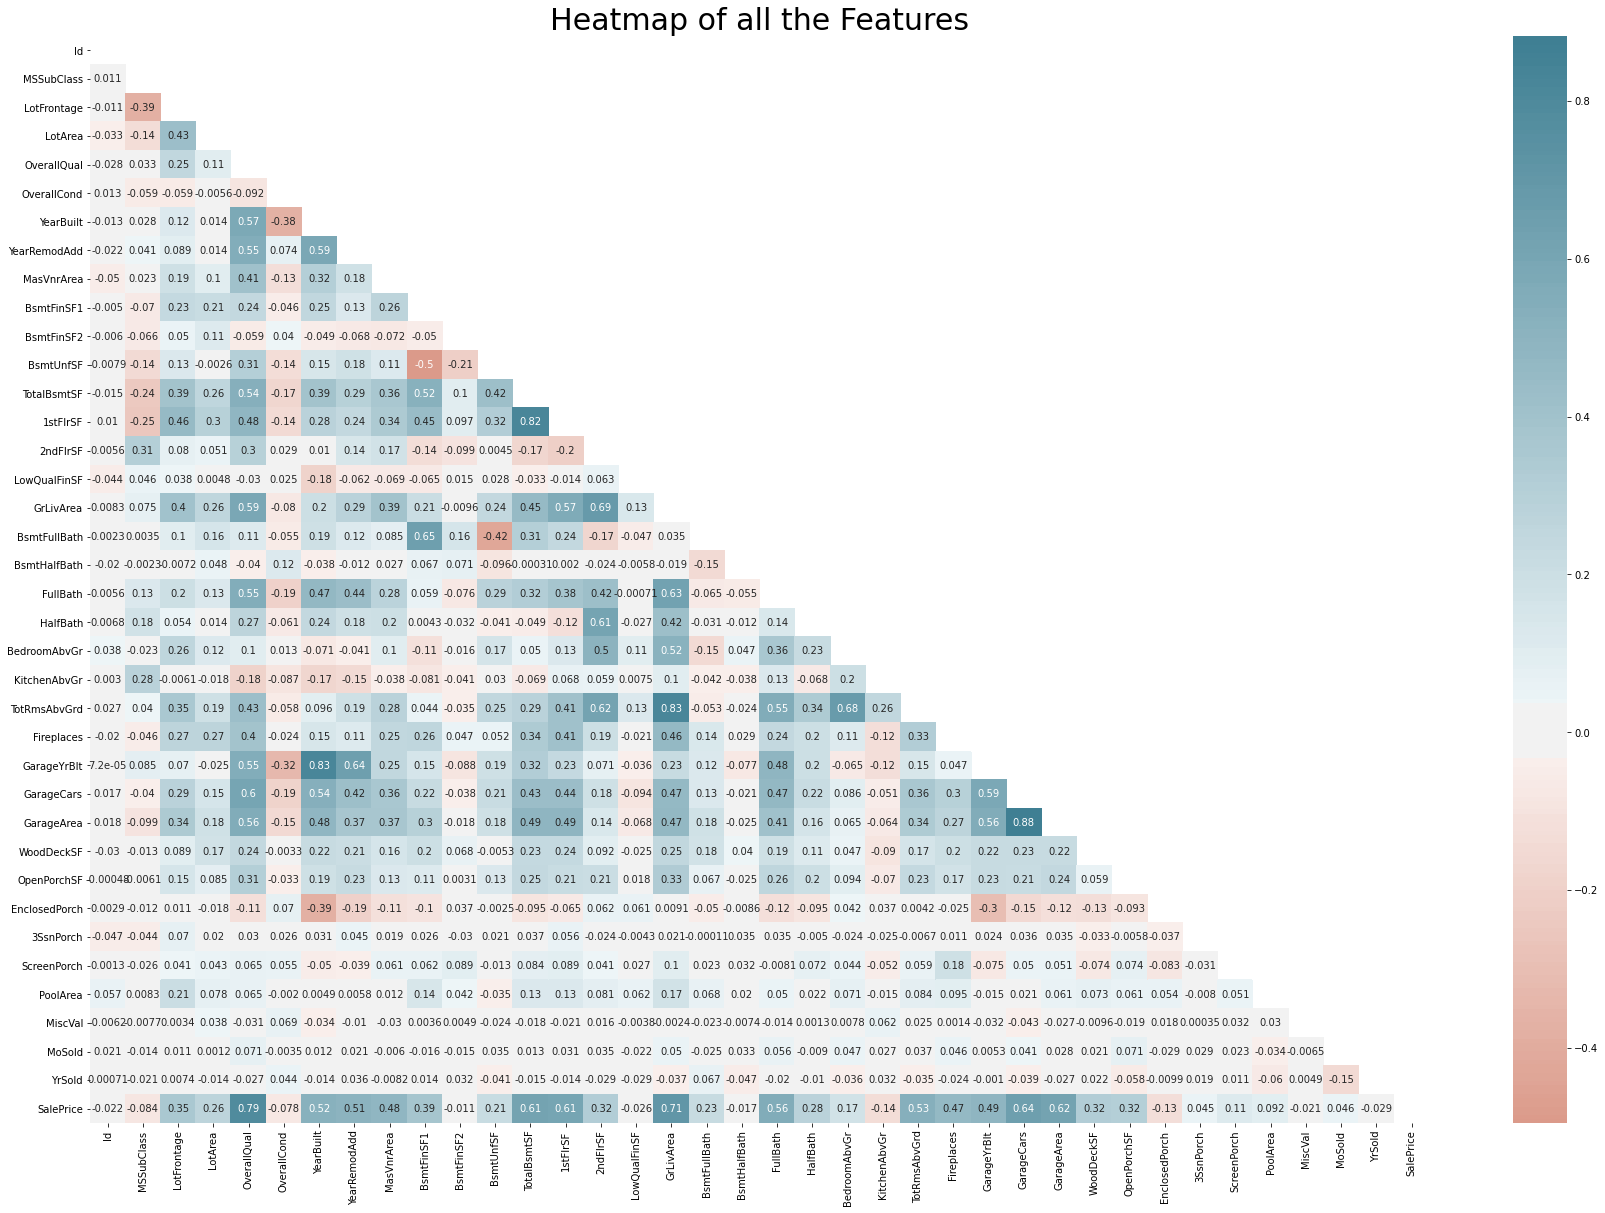

In [0]:
plt.subplots(figsize = (30,20))

mask = np.zeros_like(train_set.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_set.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
)

plt.title("Heatmap of all the Features", fontsize=30)

# Removing Unneccarly features

In [0]:
new_train=train_set.drop(['Id','Alley','Condition1','Condition2','OverallQual','Exterior1st','RoofMatl','Exterior2nd','ExterQual','ExterCond','MasVnrType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','HeatingQC','LowQualFinSF','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold'], axis=1)
new_test=test_set.drop(['Id','Alley','Condition1','Condition2','OverallQual','Exterior1st','RoofMatl','Exterior2nd','ExterQual','ExterCond','MasVnrType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','HeatingQC','LowQualFinSF','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold'], axis=1)

#Fill in missing values

TRAIN DATA 		 TEST DATA


,Total,Percent
LotFrontage,259,259
GarageType,81,81
BsmtQual,37,37
MasVnrArea,8,8
Electrical,1,1
Street,0,0
OverallCond,0,0
TotalBsmtSF,0,0
MSZoning,0,0
Foundation,0,0




  MISSING TRAINING DATA 			 MISSING TEST DATA


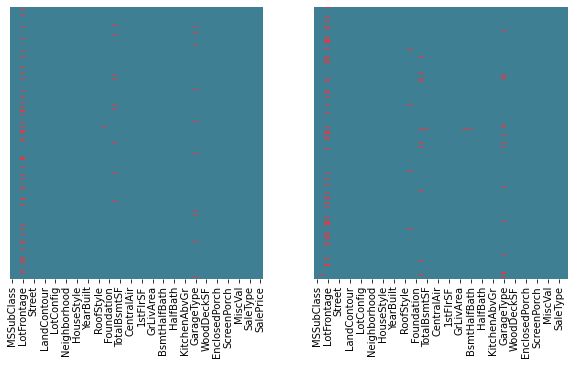

In [0]:
from IPython.display import display_html
import warnings
import seaborn as sns



#determined ht emissing data
def Missing (X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum())
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 
#plots number of dataframes side by side
def SideSide(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

# Fill empty values with NaN
new_train = new_train.fillna(np.nan)
new_test = new_test.fillna(np.nan)

#finds missing values
missing_train = Missing(new_train)
missing_test = Missing(new_test)
    
print('TRAIN DATA','\t\t','TEST DATA')
SideSide(missing_train, missing_test)

#plot missing data in heatmap for visualisation
print('\n\n  MISSING TRAINING DATA \t\t\t MISSING TEST DATA')
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize = (10,5));
plt.subplot(1, 2, 1)
sns.heatmap(new_train.isnull(), yticklabels = False, cbar = False, cmap = cmap)
plt.subplot(1, 2, 2)
sns.heatmap(new_test.isnull(), yticklabels = False, cbar = False,cmap = cmap);

In [0]:
data = [new_train, new_test]

In [0]:
new_train['LotFrontage'].value_counts()

In [0]:
new_train.LotFrontage.fillna(new_train.LotFrontage.mean(),inplace=True)
new_test.LotFrontage.fillna(new_test.LotFrontage.mean(),inplace=True)

In [0]:
new_train.MasVnrArea.value_counts()

In [0]:
data = [new_train,new_test]
for dataset in data:
  dataset.MasVnrArea.fillna(value=0.0, inplace=True)

In [0]:
new_train.MasVnrArea.isnull().any()

In [0]:
new_train.Electrical.value_counts()

In [0]:
data = [new_train,new_test]
for dataset in data:
  dataset.Electrical.fillna(value='SBrkr',inplace=True)

In [0]:
new_train.BsmtQual.value_counts()

In [0]:
fill_BsmtQual_list = ['TA','Gd']
data = [new_train,new_test]
for dataset in data:
  dataset.BsmtQual.fillna(pd.Series(np.random.choice(fill_BsmtQual_list, size= len(dataset.index))),inplace=True)


new_train.BsmtQual.value_counts()

TA    661
Gd    643
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [0]:
new_train.BsmtQual.isnull().any()

In [0]:
new_train.GarageType.value_counts()

In [0]:
fill_GarageType_list = ['Attchd','Attchd','Detchd']
data = [new_train,new_test]
for dataset in data:
  dataset.GarageType.fillna(pd.Series(np.random.choice(fill_GarageType_list, size=len( dataset.index))),inplace=True)


new_train.GarageType.value_counts()

Attchd     922
Detchd     416
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [0]:
new_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
Foundation       0
BsmtQual         0
TotalBsmtSF      0
Heating          0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageType       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [0]:
new_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
Foundation       0
BsmtQual         0
TotalBsmtSF      0
Heating          0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageType       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [0]:
new_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [0]:
new_test.MSZoning.fillna(value='RL',inplace=True )

In [0]:
new_test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [0]:
new_test.Utilities.fillna(value='AllPub', inplace=True)

In [0]:
new_test.TotalBsmtSF.value_counts()

0.0       41
864.0     39
960.0     13
546.0     12
672.0     12
          ..
918.0      1
1910.0     1
1700.0     1
750.0      1
1075.0     1
Name: TotalBsmtSF, Length: 736, dtype: int64

In [0]:
fill_TotalBsmtSF = [0.0,864.0]
new_test.TotalBsmtSF.fillna(pd.Series(np.random.choice(fill_TotalBsmtSF, size= len(new_test.index))),inplace=True)

In [0]:
new_test.BsmtFullBath.value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [0]:
fill_BsmtFullBath = [0.0,1.0]
new_test.BsmtFullBath.fillna(pd.Series(np.random.choice(fill_BsmtFullBath, size= len(new_test.index))),inplace=True)

In [0]:
new_test.BsmtHalfBath.value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [0]:
new_test.BsmtHalfBath.fillna(value=0.0, inplace=True)

In [0]:
new_test.GarageArea.value_counts()

0.0      76
576.0    50
440.0    47
484.0    34
400.0    33
         ..
364.0     1
369.0     1
316.0     1
226.0     1
353.0     1
Name: GarageArea, Length: 459, dtype: int64

In [0]:
fill_GarageArea = [0.0,576.0,440.0]
new_test.GarageArea.fillna(pd.Series(np.random.choice(fill_GarageArea, size= len(new_test.index))),inplace=True)

In [0]:
new_test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [0]:
new_test.SaleType.fillna(value='WD', inplace=True)

In [0]:
new_test.shape

(1459, 46)

In [0]:
new_train.shape

(1460, 47)

In [0]:
new_train.hist(bins=20, figsize=(20,15))

#Discover outliers with visualization tools

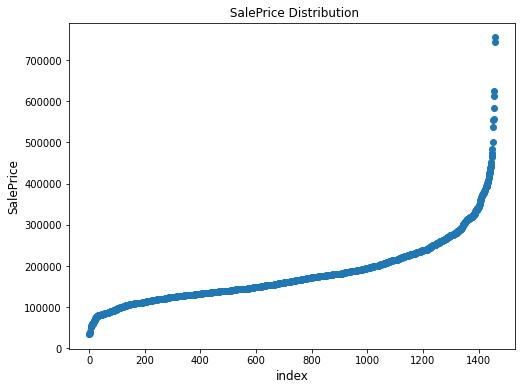

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_train.shape[0]), np.sort(new_train.SalePrice.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title(" SalePrice Distribution")
plt.show()

#Identifying Outliers with Interquartile Range (IQR), Boc plot and Hist plot

In [0]:
Q1 = new_train.quantile(0.25)
Q3 = new_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
YrSold               2.00
SalePrice        84025.00
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers.

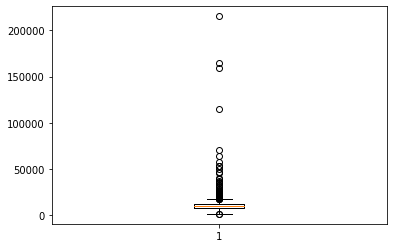

In [0]:
plt.boxplot(new_train.LotArea)
plt.show()

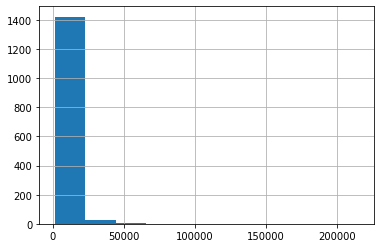

In [0]:
new_train.LotArea.hist()

#Deal with outliers - **Log transformation**

{'boxes': [<matplotlib.lines.Line2D at 0x7f2fd9497400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2fd94903c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fd9490e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fd9490ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2fd9497710>,
  <matplotlib.lines.Line2D at 0x7f2fd9490048>]}

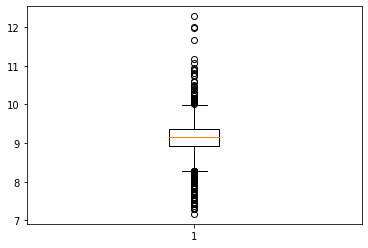

In [0]:
new_train["LotArea"] = new_train["LotArea"].map(lambda i: np.log(i) if i > 0 else 0) 
plt.boxplot(new_train.LotArea)

In [0]:
new_test["LotArea"] = new_test["LotArea"].map(lambda i: np.log(i) if i > 0 else 0) 

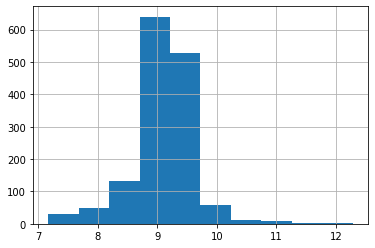

In [0]:
new_train.LotArea.hist()


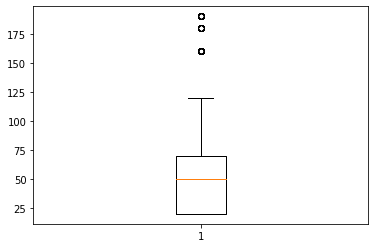

In [0]:
plt.boxplot(new_train.MSSubClass)
plt.show()

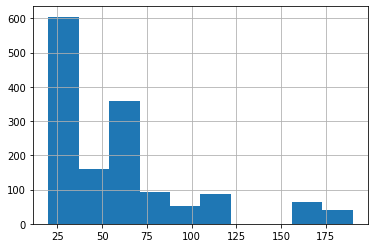

In [0]:
new_train.MSSubClass.hist()

In [0]:
new_train["MSSubClass"] = new_train["MSSubClass"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["LotFrontage"] = new_train["LotFrontage"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["YearBuilt"] = new_train["YearBuilt"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["YearRemodAdd"] = new_train["YearRemodAdd"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["MasVnrArea"] = new_train["MasVnrArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["TotalBsmtSF"] = new_train["TotalBsmtSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["1stFlrSF"] = new_train["1stFlrSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["2ndFlrSF"] = new_train["2ndFlrSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["GrLivArea"] = new_train["GrLivArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["GarageArea"] = new_train["GarageArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["WoodDeckSF"] = new_train["WoodDeckSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_train["OpenPorchSF"] = new_train["OpenPorchSF"].map(lambda i: np.log(i) if i > 0 else 0) 

# TEST DATA

new_test["MSSubClass"] = new_test["MSSubClass"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["LotFrontage"] = new_test["LotFrontage"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["YearBuilt"] = new_test["YearBuilt"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["YearRemodAdd"] = new_test["YearRemodAdd"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["MasVnrArea"] = new_test["MasVnrArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["TotalBsmtSF"] = new_test["TotalBsmtSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["1stFlrSF"] = new_test["1stFlrSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["2ndFlrSF"] = new_test["2ndFlrSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["GrLivArea"] = new_test["GrLivArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["GarageArea"] = new_test["GarageArea"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["WoodDeckSF"] = new_test["WoodDeckSF"].map(lambda i: np.log(i) if i > 0 else 0) 
new_test["OpenPorchSF"] = new_test["OpenPorchSF"].map(lambda i: np.log(i) if i > 0 else 0) 

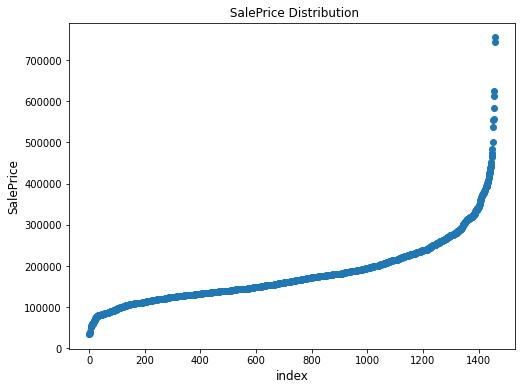

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_train.shape[0]), np.sort(new_train.SalePrice.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title(" SalePrice Distribution")
plt.show()

In [0]:
Q1 = new_train.quantile(0.25)
Q3 = new_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass           1.252763
LotFrontage          0.275103
LotArea              0.429124
OverallCond          1.000000
YearBuilt            0.023269
YearRemodAdd         0.018636
MasVnrArea           5.101386
TotalBsmtSF          0.489488
1stFlrSF             0.455766
2ndFlrSF             6.590301
GrLivArea            0.453011
BsmtFullBath         1.000000
BsmtHalfBath         0.000000
FullBath             1.000000
HalfBath             1.000000
BedroomAbvGr         1.000000
KitchenAbvGr         0.000000
TotRmsAbvGrd         2.000000
GarageArea           0.543501
WoodDeckSF           5.123964
OpenPorchSF          4.219508
EnclosedPorch        0.000000
3SsnPorch            0.000000
ScreenPorch          0.000000
PoolArea             0.000000
MiscVal              0.000000
YrSold               2.000000
SalePrice        84025.000000
dtype: float64


#Convert Categorical data

# combine the train and test set

In [0]:
all_df = pd.concat([new_train,new_test])

In [0]:
all_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
BldgType            0
HouseStyle          0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
MasVnrArea          0
Foundation          0
BsmtQual            0
TotalBsmtSF         0
Heating             0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageType          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
YrSold              0
SaleType            0
SaleCondit

In [0]:
categorical_features = all_df.select_dtypes('object').columns.to_list()
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Foundation',
 'BsmtQual',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [0]:
df_with_dummies = pd.get_dummies(all_df, columns=categorical_features)

In [0]:
df_with_dummies

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,4.174387,9.041922,5,7.602401,7.602401,5.278115,6.752270,6.752270,6.749931,7.444249,1.0,0.0,2,1,3,1,8,6.306275,0.000000,4.110874,0,0,0,0,0,2008,208500.0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.995732,4.382027,9.169518,8,7.588830,7.588830,0.000000,7.140453,7.140453,0.000000,7.140453,0.0,1.0,2,0,3,1,6,6.131226,5.697093,0.000000,0,0,0,0,0,2007,181500.0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.094345,4.219508,9.328123,5,7.601402,7.601902,5.087596,6.824374,6.824374,6.763885,7.487734,1.0,0.0,2,1,3,1,6,6.410175,0.000000,3.737670,0,0,0,0,0,2008,223500.0,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.248495,4.094345,9.164296,5,7.557473,7.585789,0.000000,6.628041,6.867974,6.628041,7.448334,1.0,0.0,1,0,3,1,7,6.464588,0.000000,3.555348,272,0,0,0,0,2006,140000.0,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.094345,4.430817,9.565214,5,7.600902,7.600902,5.857933,7.043160,7.043160,6.959399,7.695303,1.0,0.0,2,1,4,1,9,6.728629,5.257495,4.430817,0,0,0,0,0,2008,250000.0,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.075174,3.044522,7.568379,7,7.585789,7.585789,0.000000,6.302619,6.302619,6.302619,6.995766,0.0,0.0,1,1,3,1,5,0.000000,0.000000,0.000000,0,0,0,0,0,2006,NaN,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,5.075174,3.044522,7.546446,5,7.585789,7.585789,0.000000,6.302619,6.302619,6.302619,6.995766,0.0,0.0,1,1,3,1,6,5.655992,0.000000,3.178054,0,0,0,0,0,2006,NaN,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2.995732,5.075174,9.903488,7,7.580700,7.598900,0.000000,7.109879,7.109879,0.000000,7.109879,1.0,0.0,1,0,4,1,7,6.356108,6.161207,0.000000,0,0,0,0,0,2006,NaN,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,4.442651,4.127134,9.253496,5,7.596894,7.596894,0.000000,6.815640,6.877296,0.000000,6.877296,0.0,1.0,1,0,3,1,6,0.000000,4.382027,3.465736,0,0,0,0,700,2006,NaN,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#Split the all_data to train and test set

In [0]:
train_df = df_with_dummies [:1460]
test_df = df_with_dummies [2919-1459:]

In [0]:
train_df_X= train_df.drop('SalePrice', axis=1)
test_df_X= test_df.drop('SalePrice', axis=1)
train_y = train_df.SalePrice

# Scale the attributes with MinMax Scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
final_X_train = train_df_X.copy()
final_X_test = test_df_X.copy()


In [0]:
final_X_train=scaler.fit_transform(final_X_train)
final_X_train

array([[0.48799196, 0.41820812, 0.3663439 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.49506375, 0.39131677, ..., 0.        , 1.        ,
        0.        ],
       [0.48799196, 0.434909  , 0.4223585 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.55646406, 0.42385922, 0.37959669, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.434909  , 0.39368765, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47117546, 0.39806941, ..., 0.        , 1.        ,
        0.        ]])

# Find the important Features with Random Forest Classifier 
( for the purpos of knowing which features play an important rull in our prediction process)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 200, n_jobs=-1)

rnd_clf.fit(final_X_train,train_y)
importances = pd.DataFrame({'feature': train_df_X.columns, 'importance': np.round(rnd_clf.feature_importances_,3)})
importances= importances.sort_values('importance', ascending = False).set_index('feature')


In [0]:
importances.head(60)

,importance
feature,
LotArea,0.047
GrLivArea,0.047
TotalBsmtSF,0.046
1stFlrSF,0.046
GarageArea,0.045
YearBuilt,0.043
LotFrontage,0.041
YearRemodAdd,0.039
OpenPorchSF,0.033


#Train with NN- Deep learning

In [0]:
import keras
from keras import models, layers, regularizers, Sequential

In [0]:
model= models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape = (final_X_train.shape[1],)))
# model.add(layer=.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1))

In [0]:
optimizer = keras.optimizers.RMSprop(0.001)

In [0]:
model.compile(optimizer = optimizer,
              loss ='mae',
              metrics= ['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               36096     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 102,145
Trainable params: 102,145
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_fit = model.fit(final_X_train, train_y,
                      epochs = 350,
                      batch_size=5,
                      )

Epoch 1/350
1460/1460 [==============================] - 0s 308us/step - loss: 15368.1372 - mae: 15368.1357 - mse: 853259328.0000
Epoch 2/350
1460/1460 [==============================] - 0s 295us/step - loss: 15296.3060 - mae: 15296.3066 - mse: 851213696.0000
Epoch 3/350
1460/1460 [==============================] - 0s 315us/step - loss: 15296.5059 - mae: 15296.5000 - mse: 845389632.0000
Epoch 4/350
1460/1460 [==============================] - 0s 337us/step - loss: 15308.6807 - mae: 15308.6729 - mse: 846350144.0000
Epoch 5/350
1460/1460 [==============================] - 0s 321us/step - loss: 15260.5328 - mae: 15260.5342 - mse: 844401088.0000
Epoch 6/350
1460/1460 [==============================] - 0s 297us/step - loss: 15288.4626 - mae: 15288.4619 - mse: 845117760.0000
Epoch 7/350
1460/1460 [==============================] - 0s 297us/step - loss: 15297.3172 - mae: 15297.3223 - mse: 849457856.0000
Epoch 8/350
1460/1460 [==============================] - 0s 289us/step - loss: 15249.4795 

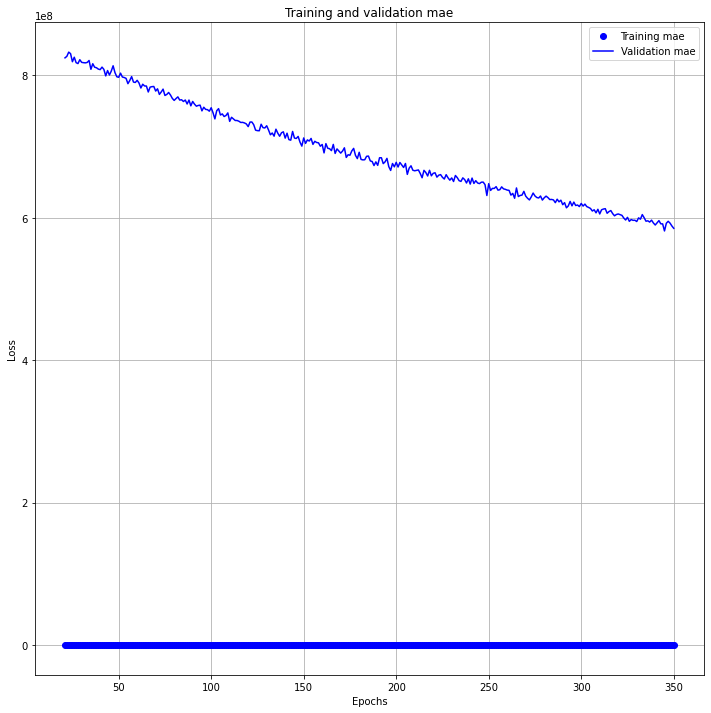

In [0]:
import matplotlib.pyplot as plt

mae = model_fit.history['mae']
val_mae = model_fit.history['mse']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(12, 12))
plt.plot(epochs[20:], mae[20:], 'bo', label='Training mae')
plt.plot(epochs[20:], val_mae[20:], 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
y_pred = model.predict(final_X_train)

print ('R square accuracy:', r2_score(train_y, y_pred))
print('Mean absolute error:', mean_absolute_error(train_y, y_pred))
print ('Mean squared error:', mean_squared_error(train_y, y_pred))

R square accuracy: 0.9077904401024173
Mean absolute error: 10578.825829409247
Mean squared error: 581546199.8221571


In [0]:
y_pred[0:10]

array([[213573.44],
       [181471.1 ],
       [224383.52],
       [159299.25],
       [269920.72],
       [145699.75],
       [297880.12],
       [208674.6 ],
       [128690.91],
       [119246.19]], dtype=float32)

In [0]:
y_test_predict = model.predict(final_X_test)


# Exporting results to the csv

In [0]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_test_predict
sub.to_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With NN/submission_House Prices with NN.csv',index=False)